In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
df = pd.read_csv('data/Classified Data', index_col = 0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
#no caso de KNN ou quando as variáveis diversas são mto distantes uma das outras, devemos coloca-las em escala para
#padronizar a distribuição das mesmas de forma proporcional em relação a umas das outras.

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
df_scaled = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [12]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])

In [13]:
#dados proporcionais agora! Bem melhor!

df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [14]:
# fatiando os dados para treino e teste 

X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
#treinando modelo KNN com parte dos dados

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
#fazendo predição a partir da fatia teste

pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#classification report e confusion matrix == modelo treinado/dados reais X predições. Precisão de 92% em prever o target class
#0 ou 1 com base em WTT	PTI	EQW	SBI	LQE	QWG	FDJ	PJF	HQE	NXJ (seja la o que eles signifiquem!)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [22]:
#afim de tentar melhorar a precisão do modelo, pode-se utilizar o método "cotovelo" fazendo-se um plot de diversas taxas de erro
# X o valor de K escolhido na linha 16! Note que num dataset grande a recursão abaixo utilizaria uma quantidade bem grande
# de capacidade computacional pois precisaria treinar 39 modelos KNN com K diferentes e adicionar a taxa de erro à lista! 


error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

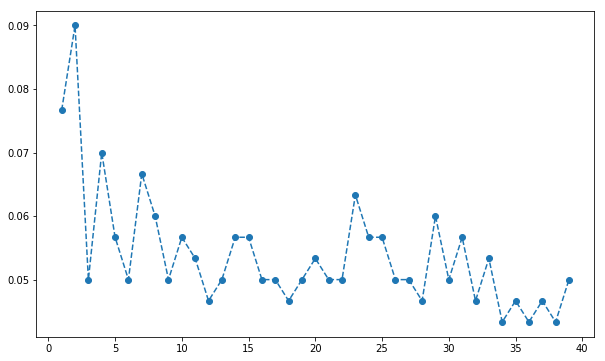

In [31]:
#o abaixo mostra claramente que por volta de K == 34 e K== 38 está a taxa de erro mais baixa!

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker = 'o', linestyle='dashed')

In [32]:
#novo treino com KNN 34 e precisão de 96%

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300

